In [1]:
import numpy as np
from mockFactory import *

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
NFWPosition(10**10)

1


[0.02101103170376693, 0.0034664586922000537, 0.006144178955279852]

In [5]:
haloConcentration(2*10**11)

7

In [3]:
from colossus.halo import concentration

In [8]:
concentration.modelBullock01(10**11, 0.84)

(6.797242929759987, True)

In [24]:
%%time
concentration.concentration(np.logspace(10, 15, 2000), "vir", 0.84, model="bullock01")

CPU times: user 5.36 s, sys: 68.8 ms, total: 5.43 s
Wall time: 5.41 s


array([9.27684249, 9.27264271, 9.26844363, ..., 2.97807972, 2.97676763,
       2.97545928])

In [28]:
from scipy.interpolate import interp1d
f = interp1d(np.linspace(9,15,200), 
             concentration.concentration(10**np.linspace(9, 15, 200), "vir", 0.84, model="bullock01"))

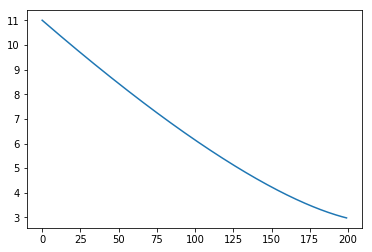

In [27]:
plt.plot(concentration.concentration(np.logspace(9, 15, 200), "vir", 0.84, model="bullock01"))

In [23]:
cvir

6.162291501962872

In [22]:
rvir

0.24107934936157766

In [24]:
rs

0.03912170485359006

In [25]:
max_p

0.004808232031372421

In [27]:
pr

0.5826440364007678

In [16]:
%%time
r_s = []
for _ in range(10000):
    r = NFWPosition(10.0**12)
    r_s.append(np.sqrt(r[0]**2 + r[1]**2 + r[2]**2))

CPU times: user 23.9 s, sys: 210 ms, total: 24.1 s
Wall time: 24 s


In [10]:
import bisect
def pdf(x):
    return np.log(x+1) - x/(x+1)

def dx(x):
    return x / (x+1)**2

def newton(x0, y):
    e = 10**-6
    x = 0
    it = 0
    while abs(x - x0) > e:
        it += 1
        x = x0
        x0 = x - (pdf(x) - y) / dx(x)
    return x0

interval = 10**-2
table = pdf(np.arange(0, 10, interval))

def get_x0(y):
    idx = bisect.bisect_left(table, y)
    return idx * interval

m = 10.0**12
cvir = haloConcentration(m)
rvir = pow(3*m / (4*DELTA_HALO*np.pi*RHO_CRIT*OMEGA_M), 1.0/3.0)
rs = rvir/cvir

def myNFWposition(m):
    y = np.random.rand() * pdf(cvir)
    return rs*newton(get_x0(y), y)

In [12]:
%%time
my_r_s = [myNFWposition(10.0**12) for _ in range(100000)]

CPU times: user 1.35 s, sys: 98.6 ms, total: 1.45 s
Wall time: 1.37 s


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


'\nwhile True:\n    r = np.random.rand() * rvir\n    pr = NFWDensity(r,rs,1.0)*r*r*4.0*np.pi / max_p\n\n    if np.random.rand() <= pr:\n        costheta = 2.0*np.random.rand() - 1\n        sintheta = np.sqrt(1-costheta**2)\n        phi = 2*np.pi*np.random.rand()\n\n[r*sintheta*np.cos(phi), r*sintheta*np.sin(phi), r*costheta]\n'

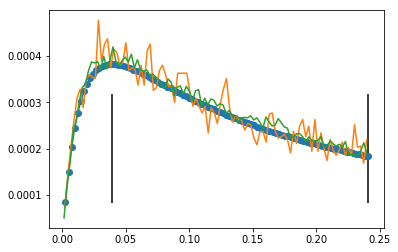

In [17]:
m = 10.0**12
cvir = haloConcentration(m)
rvir = pow(3*m / (4*DELTA_HALO*np.pi*RHO_CRIT*OMEGA_M), 1.0/3.0)
rs = rvir/cvir
max_p = NFWDensity(rs,rs,1.0)*rs*rs*4.0*np.pi

#plt.yscale("log")
#plt.xscale("log")
r = np.logspace(np.log10(0.0001), np.log10(100*rvir), 100)
r = np.linspace(0, rvir, 100)
plt.plot(r, r**2*NFWDensity(r, rs, 1.0), 'o-')
ymin, ymax = plt.ylim()
plt.vlines(rs, ymin*1.2, ymax*0.8, label="Rs")
plt.vlines(rvir, ymin*1.2, ymax*0.8, label="Rvir")
#locs += [rs, rvir]
#labels += ["Rs", "Rvir"]
histo, bins = np.histogram(r_s, bins=100)
plt.plot((bins[:-1]+bins[1:])/2, histo/350000)

histo, bins = np.histogram(my_r_s, bins=100)
plt.plot((bins[:-1]+bins[1:])/2, histo/3500000)

'''
while True:
    r = np.random.rand() * rvir
    pr = NFWDensity(r,rs,1.0)*r*r*4.0*np.pi / max_p

    if np.random.rand() <= pr:
        costheta = 2.0*np.random.rand() - 1
        sintheta = np.sqrt(1-costheta**2)
        phi = 2*np.pi*np.random.rand()

[r*sintheta*np.cos(phi), r*sintheta*np.sin(phi), r*costheta]
'''